# Installing and Importing the required Libraries

In [1]:
import pandas as pd # library for data analysis
import numpy as np
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import json # library to handle JSON files

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Scraping the Wikipedia page for the table of postal codes of Canada and Data preprocessing and cleaning

In [2]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)


# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
postaltable=soup.find('table',{'class':"wikitable"})


df=pd.read_html(str(postaltable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())


# Dropping the rows where Borough is 'Not assigned'
df_new = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode

df2= df_new.groupby(['Postal Code', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df2.head()

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2.Neighbourhood =  np.where(df2.Neighbourhood == "Not assigned",df2.Borough,df2.Neighbourhood)
df2

df2.shape





200
  Postal Code           Borough              Neighbourhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront


(103, 3)

# Importing the csv file conatining the latitudes and longitudes for various neighbourhoods in Canada

In [3]:
# get the data and create the dataframe



df_geo = pd.read_csv('https://cocl.us/Geospatial_data')
df_geo.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [4]:
df3 = pd.merge(df2, df_geo, on = 'Postal Code')
df3.head()

Postal Code      Borough                           Neighbourhood   Latitude  \
0         M1B  Scarborough                          Malvern, Rouge  43.806686   
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2         M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3         M1G  Scarborough                                  Woburn  43.770992   
4         M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [5]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df3['Borough'].unique()),
        df3.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [6]:
Toronto_data = df3[df3['Borough'] == 'Toronto'].reset_index(drop=True)
Toronto_data.head()

Empty DataFrame
Columns: [Postal Code, Borough, Neighbourhood, Latitude, Longitude]
Index: []

In [7]:
#We work with only "Borough" which contain the word Toronto 
df4=df3[df3['Borough'].str.contains('Toronto')]
Toronto_data=df4.reset_index(drop=True)
Toronto_data

Postal Code           Borough  \
0          M4E      East Toronto   
1          M4K      East Toronto   
2          M4L      East Toronto   
3          M4M      East Toronto   
4          M4N   Central Toronto   
5          M4P   Central Toronto   
6          M4R   Central Toronto   
7          M4S   Central Toronto   
8          M4T   Central Toronto   
9          M4V   Central Toronto   
10         M4W  Downtown Toronto   
11         M4X  Downtown Toronto   
12         M4Y  Downtown Toronto   
13         M5A  Downtown Toronto   
14         M5B  Downtown Toronto   
15         M5C  Downtown Toronto   
16         M5E  Downtown Toronto   
17         M5G  Downtown Toronto   
18         M5H  Downtown Toronto   
19         M5J  Downtown Toronto   
20         M5K  Downtown Toronto   
21         M5L  Downtown Toronto   
22         M5N   Central Toronto   
23         M5P   Central Toronto   
24         M5R   Central Toronto   
25         M5S  Downtown Toronto   
26         M5T  Downtown Toronto   
27         M5V  Downtown Toronto   
28         M5W  Downtown Toronto   
29         M5X  Downtown Toronto   
30         M6G  Downtown Toronto   
31         M6H      West Toronto   
32         M6J      West Toronto   
33         M6K      West Toronto   
34         M6P      West Toronto   
35         M6R      West Toronto   
36         M6S      West Toronto   
37         M7A  Downtown Toronto   
38         M7Y      East Toronto   

                                        Neighbourhood   Latitude  Longitude  
0                                         The Beaches  43.676357 -79.293031  
1                        The Danforth West, Riverdale  43.679557 -79.352188  
2                      India Bazaar, The Beaches West  43.668999 -79.315572  
3                                     Studio District  43.659526 -79.340923  
4                                       Lawrence Park  43.728020 -79.388790  
5                                    Davisville North  43.712751 -79.390197  
6                   North Toronto West, Lawrence Park  43.715383 -79.405678  
7                                          Davisville  43.704324 -79.388790  
8                         Moore Park, Summerhill East  43.689574 -79.383160  
9   Summerhill West, Rathnelly, South Hill, Forest...  43.686412 -79.400049  
10                                           Rosedale  43.679563 -79.377529  
11                        St. James Town, Cabbagetown  43.667967 -79.367675  
12                               Church and Wellesley  43.665860 -79.383160  
13                          Regent Park, Harbourfront  43.654260 -79.360636  
14                           Garden District, Ryerson  43.657162 -79.378937  
15                                     St. James Town  43.651494 -79.375418  
16                                        Berczy Park  43.644771 -79.373306  
17                                 Central Bay Street  43.657952 -79.387383  
18                           Richmond, Adelaide, King  43.650571 -79.384568  
19  Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752  
20           Toronto Dominion Centre, Design Exchange  43.647177 -79.381576  
21                     Commerce Court, Victoria Hotel  43.648198 -79.379817  
22                                           Roselawn  43.711695 -79.416936  
23    Forest Hill North & West, Forest Hill Road Park  43.696948 -79.411307  
24                The Annex, North Midtown, Yorkville  43.672710 -79.405678  
25                     University of Toronto, Harbord  43.662696 -79.400049  
26          Kensington Market, Chinatown, Grange Park  43.653206 -79.400049  
27  CN Tower, King and Spadina, Railway Lands, Har...  43.628947 -79.394420  
28                                     Stn A PO Boxes  43.646435 -79.374846  
29             First Canadian Place, Underground city  43.648429 -79.382280  
30                                           Christie  43.669542 -79.422564  
31                       Dufferin, Dovercourt Village  43.669005 -

In [8]:
address = 'Toronto'

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


# Visualizing all the Neighbourhoods of the above data frame using Folium

In [9]:
# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighbourhood in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Borough'], Toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [10]:




CLIENT_ID = 'ZNJ23MZU50ERHJGOART4DVUC0ONLCPWVWCWUPZRFHWU4IG52'
 # your Foursquare ID
CLIENT_SECRET = 'NXAM4XVP3XYVPH3FUHZ5MKRC2DBXMALRQDYCJQVOZDXKFZPK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


radius = 500 # define radius

Your credentails:
CLIENT_ID: ZNJ23MZU50ERHJGOART4DVUC0ONLCPWVWCWUPZRFHWU4IG52
CLIENT_SECRET:NXAM4XVP3XYVPH3FUHZ5MKRC2DBXMALRQDYCJQVOZDXKFZPK


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
Toronto_data_venues = getNearbyVenues(names=Toronto_data['Neighbourhood'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [13]:
print(Toronto_data_venues.shape)
Toronto_data_venues.head()

(1639, 7)


Neighborhood  Neighborhood Latitude  \
0                   The Beaches              43.676357   
1                   The Beaches              43.676357   
2                   The Beaches              43.676357   
3                   The Beaches              43.676357   
4  The Danforth West, Riverdale              43.679557   

   Neighborhood Longitude                               Venue  Venue Latitude  \
0              -79.293031                   Glen Manor Ravine       43.676821   
1              -79.293031  The Big Carrot Natural Food Market       43.678879   
2              -79.293031                 Grover Pub and Grub       43.679181   
3              -79.293031                       Upper Beaches       43.680563   
4              -79.352188                            Pantheon       43.677621   

   Venue Longitude     Venue Category  
0       -79.293942              Trail  
1       -79.297734  Health Food Store  
2       -79.297215                Pub  
3       -79.292869       Neighborhood  
4       -79.351434   Greek Restaurant

In [14]:
#Number of venues per neighborhood
Toronto_data_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            55   
Brockton, Parkdale Village, Exhibition Place                           25   
Business reply mail Processing Centre, South Ce...                     16   
CN Tower, King and Spadina, Railway Lands, Harb...                     17   
Central Bay Street                                                     68   
Christie                                                               16   
Church and Wellesley                                                   75   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             34   
Davisville North                                                        9   
Dufferin, Dovercourt Village                                           13   
First Canadian Place, Underground city                                100   
Forest Hill North & West, Forest Hill Road Park                         5   
Garden District, Ryerson                                              100   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          26   
India Bazaar, The Beaches West                                         19   
Kensington Market, Chinatown, Grange Park                              74   
Lawrence Park                                                           3   
Little Portugal, Trinity                                               46   
Moore Park, Summerhill East                                             2   
North Toronto West, Lawrence Park                                      18   
Parkdale, Roncesvalles                                                 14   
Queen's Park, Ontario Provincial Government                            33   
Regent Park, Harbourfront                                              45   
Richmond, Adelaide, King                                              100   
Rosedale                                                                5   
Roselawn                                                                3   
Runnymede, Swansea                                                     35   
St. James Town                                                         85   
St. James Town, Cabbagetown                                            50   
Stn A PO Boxes                                                         96   
Studio District                                                        37   
Summerhill West, Rathnelly, South Hill, Forest ...                     14   
The Annex, North Midtown, Yorkville                                    19   
The Beaches                                                             4   
The Danforth West, Riverdale                                           44   
Toronto Dominion Centre, Design Exchange                              100   
University of Toronto, Harbord                                         34   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Berczy Park                                                             55   
Brockton, Parkdale Village, Exhibition Place                            25   
Business reply mail Processing Centre, South Ce...                      16   
CN Tower, King and Spadina, Railway Lands, Harb...                      17   
Central Bay Street                                                      68   
Christie                                                                16   
Church and Wellesley                                                    75   
Commerce Court, Victoria Hotel                                         100   
Davisville                                                              34   
Davisville North                    

In [15]:
#Number of unique venue categories
print('There are {} uniques categories.'.format(len(Toronto_data_venues['Venue Category'].unique())))

There are 240 uniques categories.


In [16]:
#print out the list of categories
Toronto_data_venues['Venue Category'].unique()

array(['Trail', 'Health Food Store', 'Pub', 'Neighborhood',
       'Greek Restaurant', 'Cosmetics Shop', 'Italian Restaurant',
       'Ice Cream Shop', 'Brewery', 'Yoga Studio',
       'Fruit & Vegetable Store', 'Restaurant', 'Juice Bar',
       'Pizza Place', 'Bookstore', 'Furniture / Home Store',
       'Dessert Shop', 'Bubble Tea Shop', 'Grocery Store', 'Spa',
       'Coffee Shop', 'Bakery', 'Caribbean Restaurant',
       'Indian Restaurant', 'Café', 'Lounge', 'Frozen Yogurt Shop',
       'Sushi Restaurant', 'American Restaurant', 'Liquor Store', 'Gym',
       'Fish & Chips Shop', 'Fast Food Restaurant', 'Park', 'Pet Store',
       'Steakhouse', 'Burrito Place', 'Movie Theater', 'Sandwich Place',
       'Fish Market', 'Gay Bar', 'Seafood Restaurant', 'Cheese Shop',
       'Middle Eastern Restaurant', 'Thai Restaurant', 'Stationery Store',
       'Comfort Food Restaurant', 'Coworking Space',
       'Latin American Restaurant', 'Gastropub', 'Clothing Store',
       'Gym / Fitness Cent

In [17]:
"Chinese Restaurant" in Toronto_data_venues['Venue Category'].unique()

True

In [18]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_data_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]
print(Toronto_onehot.shape)

Toronto_onehot.columns

(1639, 240)


Index(['Yoga Studio', 'Afghan Restaurant', 'Airport', 'Airport Food Court',
       'Airport Gate', 'Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Antique Shop',
       ...
       'Theater', 'Theme Restaurant', 'Toy / Game Store', 'Trail',
       'Train Station', 'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Women's Store'],
      dtype='object', length=240)

In [19]:
Toronto_onehot.head()

Yoga Studio  Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0            0                  0        0                   0             0   
1            0                  0        0                   0             0   
2            0                  0        0                   0             0   
3            0                  0        0                   0             0   
4            0                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  Baby Store  \
0                 0                   0              0          0           0   
1                 0                   0              0          0           0   
2                 0                   0              0          0           0   
3                 0                   0              0          0           0   
4                 0                   0              0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Stadium  Basketball Stadium  Beach  \
0           0       0     0    0                 0                   0      0   
1           0       0     0    0                 0                   0      0   
2           0       0     0    0                 0                   0      0   
3           0       0     0    0                 0                   0      0   
4           0       0     0    0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bistro  \
0                0         0           0                   0       0   
1                0         0           0                   0       0   
2                0         0           0                   0       0   
3                0         0           0                   0       0   
4                0         0           0                   0       0   

   Boat or Ferry  Bookstore  Boutique  Bowling Alley  Brazilian Restaurant  \
0              0          0         0              0                     0   
1              0          0         0              0                     0   
2              0          0         0              0                     0   
3              0          0         0              0                     0   
4              0          0         0              0                     0   

   Breakfast Spot  Brewery  Bubble Tea Shop  Building  Burger Joint  \
0               0        0                0         0             0   
1               0        0                0         0             0   
2               0        0                0         0             0   
3               0        0                0         0             0   
4               0        0                0         0             0   

   Burrito Place  Bus Line  Butcher  Café  Cajun / Creole Restaurant  \
0              0         0        0     0                          0   
1              0         0        0     0                          0   
2              0         0        0     0                          0   
3              0 

In [20]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(Toronto_grouped.shape)
Toronto_grouped

(39, 240)


Neighborhood  Yoga Studio  \
0                                         Berczy Park     0.000000   
1        Brockton, Parkdale Village, Exhibition Place     0.000000   
2   Business reply mail Processing Centre, South C...     0.000000   
3   CN Tower, King and Spadina, Railway Lands, Har...     0.000000   
4                                  Central Bay Street     0.014706   
5                                            Christie     0.000000   
6                                Church and Wellesley     0.026667   
7                      Commerce Court, Victoria Hotel     0.000000   
8                                          Davisville     0.000000   
9                                    Davisville North     0.000000   
10                       Dufferin, Dovercourt Village     0.000000   
11             First Canadian Place, Underground city     0.000000   
12    Forest Hill North & West, Forest Hill Road Park     0.000000   
13                           Garden District, Ryerson     0.000000   
14  Harbourfront East, Union Station, Toronto Islands     0.000000   
15                      High Park, The Junction South     0.000000   
16                     India Bazaar, The Beaches West     0.000000   
17          Kensington Market, Chinatown, Grange Park     0.000000   
18                                      Lawrence Park     0.000000   
19                           Little Portugal, Trinity     0.021739   
20                        Moore Park, Summerhill East     0.000000   
21                  North Toronto West, Lawrence Park     0.055556   
22                             Parkdale, Roncesvalles     0.000000   
23        Queen's Park, Ontario Provincial Government     0.030303   
24                          Regent Park, Harbourfront     0.022222   
25                           Richmond, Adelaide, King     0.000000   
26                                           Rosedale     0.000000   
27                                           Roselawn     0.000000   
28                                 Runnymede, Swansea     0.028571   
29                                     St. James Town     0.000000   
30                        St. James Town, Cabbagetown     0.000000   
31                                     Stn A PO Boxes     0.010417   
32                                    Studio District     0.027027   
33  Summerhill West, Rathnelly, South Hill, Forest...     0.000000   
34                The Annex, North Midtown, Yorkville     0.000000   
35                                        The Beaches     0.000000   
36                       The Danforth West, Riverdale     0.022727   
37           Toronto Dominion Centre, Design Exchange     0.000000   
38                     University of Toronto, Harbord     0.029412   

    Afghan Restaurant   Airport  Airport Food Court  Airport Gate  \
0            0.000000  0.000000            0.000000      0.000000   
1            0.000000  0.000000            0.000000      0.000000   
2            0.000000  0.000000            0.000000      0.000000   
3            0.000000  0.058824            0.058824      0.058824   
4            0.000000  0.000000            0.000000      0.000000   
5            0.000000  0.000000            0.000000      0.000000   
6            0.013333  0.000000            0.000000      0.000000   
7            0.000000  0.000000            0.000000      0.000000   
8            0.000000  0.000000            0.000000      0.000000   
9            0.000000  0.000000            0.000000      0.000000   
10           0.000000  0.000000            0.000000      0.000000   
11           0.000000  0.000000            0.000000      0.000000   
12           0.000000  0.000000            0.000000      0.000000   
13           0.000000  0.000000            0.000000      0.000000   
14           0.000000  0.000000            0.000000      0.000000   
15           0.000000  0.000000            0.000000      0.000000   
16           0.000000  0.000000            0.000000      0.000000  

# Neighborhoods vs No of Chinese Restaurant

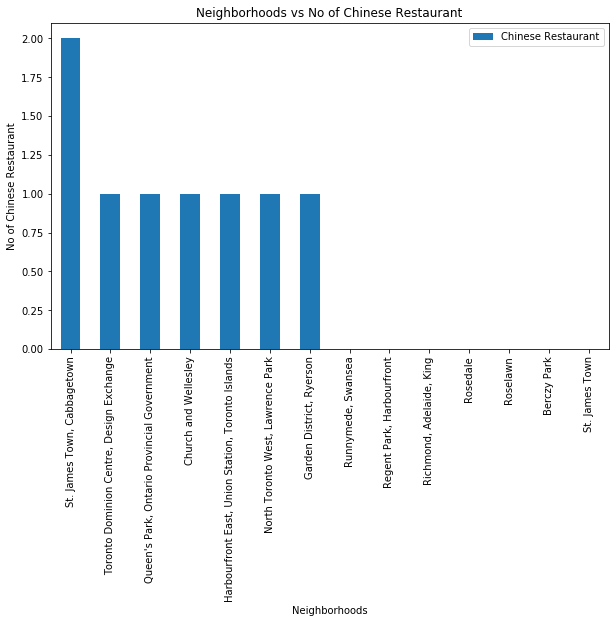

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

graph = pd.DataFrame(Toronto_onehot.groupby('Neighborhood')['Chinese Restaurant'].sum())
graph = graph.sort_values(by ='Chinese Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Chinese Restaurant")
plt.title("Neighborhoods vs No of Chinese Restaurant")
plt.show()

In [22]:
len(Toronto_grouped[Toronto_grouped["Chinese Restaurant"] > 0])

7

In [23]:
Toronto_asian = Toronto_grouped[["Neighborhood","Chinese Restaurant"]]

In [24]:
Toronto_asian

Neighborhood  Chinese Restaurant
0                                         Berczy Park            0.000000
1        Brockton, Parkdale Village, Exhibition Place            0.000000
2   Business reply mail Processing Centre, South C...            0.000000
3   CN Tower, King and Spadina, Railway Lands, Har...            0.000000
4                                  Central Bay Street            0.000000
5                                            Christie            0.000000
6                                Church and Wellesley            0.013333
7                      Commerce Court, Victoria Hotel            0.000000
8                                          Davisville            0.000000
9                                    Davisville North            0.000000
10                       Dufferin, Dovercourt Village            0.000000
11             First Canadian Place, Underground city            0.000000
12    Forest Hill North & West, Forest Hill Road Park            0.000000
13                           Garden District, Ryerson            0.010000
14  Harbourfront East, Union Station, Toronto Islands            0.010000
15                      High Park, The Junction South            0.000000
16                     India Bazaar, The Beaches West            0.000000
17          Kensington Market, Chinatown, Grange Park            0.000000
18                                      Lawrence Park            0.000000
19                           Little Portugal, Trinity            0.000000
20                        Moore Park, Summerhill East            0.000000
21                  North Toronto West, Lawrence Park            0.055556
22                             Parkdale, Roncesvalles            0.000000
23        Queen's Park, Ontario Provincial Government            0.030303
24                          Regent Park, Harbourfront            0.000000
25                           Richmond, Adelaide, King            0.000000
26                                           Rosedale            0.000000
27                                           Roselawn            0.000000
28                                 Runnymede, Swansea            0.000000
29                                     St. James Town            0.000000
30                        St. James Town, Cabbagetown            0.040000
31                                     Stn A PO Boxes            0.000000
32                                    Studio District            0.000000
33  Summerhill West, Rathnelly, South Hill, Forest...            0.000000
34                The Annex, North Midtown, Yorkville            0.000000
35                                        The Beaches            0.000000
36                       The Danforth West, Riverdale            0.000000
37           Toronto Dominion Centre, Design Exchange            0.010000
38                     University of Toronto, Harbord            0.000000

In [25]:
# set number of clusters
kclusters = 2

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:38] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [26]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
Toronto_merged = Toronto_asian.copy()

# add clustering labels
Toronto_merged["Cluster Labels"] = kmeans.labels_

In [27]:
Toronto_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
Toronto_merged.head()

Neighborhood  Chinese Restaurant  \
0                                        Berczy Park                 0.0   
1       Brockton, Parkdale Village, Exhibition Place                 0.0   
2  Business reply mail Processing Centre, South C...                 0.0   
3  CN Tower, King and Spadina, Railway Lands, Har...                 0.0   
4                                 Central Bay Street                 0.0   

   Cluster Labels  
0               0  
1               0  
2               0  
3               0  
4               0

In [28]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(Toronto_data_venues.set_index("Neighborhood"), on="Neighborhood")

print(Toronto_merged.shape)
Toronto_merged.head()

(1639, 9)


Neighborhood  Chinese Restaurant  Cluster Labels  Neighborhood Latitude  \
0  Berczy Park                 0.0               0              43.644771   
0  Berczy Park                 0.0               0              43.644771   
0  Berczy Park                 0.0               0              43.644771   
0  Berczy Park                 0.0               0              43.644771   
0  Berczy Park                 0.0               0              43.644771   

   Neighborhood Longitude                                 Venue  \
0              -79.373306  The Keg Steakhouse + Bar - Esplanade   
0              -79.373306                                  LCBO   
0              -79.373306                        Fresh On Front   
0              -79.373306                         Meridian Hall   
0              -79.373306                Goose Island Brewhouse   

   Venue Latitude  Venue Longitude                 Venue Category  
0       43.646712       -79.374768                     Restaurant  
0       43.642944       -79.372440                   Liquor Store  
0       43.647815       -79.374453  Vegetarian / Vegan Restaurant  
0       43.646292       -79.376022                   Concert Hall  
0       43.647329       -79.373541                       Beer Bar

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Neighborhood Latitude'], Toronto_merged['Neighborhood Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [30]:
#Cluster 0
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0]

Neighborhood  Chinese Restaurant  \
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                         Berczy Park            0.000000   
0                                    

In [31]:
#Cluster 1
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1]

Neighborhood  Chinese Restaurant  \
12  Forest Hill North & West, Forest Hill Road Park                 0.0   
12  Forest Hill North & West, Forest Hill Road Park                 0.0   
12  Forest Hill North & West, Forest Hill Road Park                 0.0   
12  Forest Hill North & West, Forest Hill Road Park                 0.0   
12  Forest Hill North & West, Forest Hill Road Park                 0.0   
18                                    Lawrence Park                 0.0   
18                                    Lawrence Park                 0.0   
18                                    Lawrence Park                 0.0   
20                      Moore Park, Summerhill East                 0.0   
20                      Moore Park, Summerhill East                 0.0   
26                                         Rosedale                 0.0   
26                                         Rosedale                 0.0   
26                                         Rosedale                 0.0   
26                                         Rosedale                 0.0   
26                                         Rosedale                 0.0   

    Cluster Labels  Neighborhood Latitude  Neighborhood Longitude  \
12               1              43.696948              -79.411307   
12               1              43.696948              -79.411307   
12               1              43.696948              -79.411307   
12               1              43.696948              -79.411307   
12               1              43.696948              -79.411307   
18               1              43.728020              -79.388790   
18               1              43.728020              -79.388790   
18               1              43.728020              -79.388790   
20               1              43.689574              -79.383160   
20               1              43.689574              -79.383160   
26               1              43.679563              -79.377529   
26               1              43.679563              -79.377529   
26               1              43.679563              -79.377529   
26               1              43.679563              -79.377529   
26               1              43.679563              -79.377529   

                              Venue  Venue Latitude  Venue Longitude  \
12       Kay Gardner Beltline Trail       43.698446       -79.406873   
12            Forest Hill Road Park       43.697945       -79.406605   
12  Nikko Sushi Japenese Restaurant       43.700443       -79.407957   
12                      Chimichanga       43.700354       -79.407605   
12                   Oliver jewelry       43.700374       -79.407644   
18             Lawrence Park Ravine       43.726963       -79.394382   
18               Zodiac Swim School       43.728532       -79.382860   
18   TTC Bus #162 - Lawrence-Donway       43.728026       -79.382805   
20                           Ravine       43.690356       -79.386841   
20                   Moorevale Park       43.693610       -79.383465   
26                    Rosedale Park       43.682328       -79.378934   
26                     Whitney Park       43.682036       -79.373788   
26             Rosedale Tennis Club       43.683226       -79.378984   
26             Alex Murray Parkette       43.678300       -79.382773   
26                   Milkman's Lane       43.676352       -79.373842   

        Venue Category  
12               Trail  
12                Park  
12    Sushi Restaurant  
12  Mexican Restaurant  
12       Jewelry Store  
18                Park  
18         Swim School  
18            Bus Line  
20               Trail  
20          Playground  
26          Playground  
26                Park  
26        Tennis Court  
26                Park  
26               Trail

In [32]:
Toronto_merged['Cluster Labels'].value_counts()

0    1624
1      15
Name: Cluster Labels, dtype: int64